In [2]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as mpatches
from numpy import average
import seaborn as sb
import datetime as dt
from collections import Counter
import glob
import json
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame

# called to counteract dark-mode Jupyter from swallowing axes &c.
plt.style.use('seaborn-whitegrid')

In [3]:
station_info = pd.read_csv('data/mod_data/stationinfo_conv.csv')

In [4]:
station_info.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,678.0,338.500000,195.866026,0.000000,169.250000,338.500000,507.750000,677.000000
longitude,678.0,-77.064049,0.090858,-77.368416,-77.090483,-77.044581,-77.010914,-76.825535
region_id,677.0,52.090103,26.753131,40.000000,42.000000,42.000000,43.000000,152.000000
legacy_id,678.0,360.805310,208.893746,1.000000,180.250000,357.500000,540.750000,728.000000
capacity,678.0,17.109145,5.206791,9.000000,15.000000,15.000000,19.000000,55.000000
latitude,678.0,38.912658,0.064426,38.782633,38.879537,38.900448,38.938427,39.125828
short_name,678.0,31623.967552,436.655733,31000.000000,31237.250000,31621.500000,32009.750000,32609.000000


In [5]:
usa = gpd.read_file('map/states.shp')
wash_dc = gpd.read_file('cmap/Roads.shp')

In [6]:
usa.head(32)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [7]:
wash_dc.head()

,FEATURECOD,DESCRIPTIO,CAPTUREYEA,CAPTUREACT,GIS_ID,OBJECTID,SHAPEAREA,SHAPELEN,geometry
0,1060,Alley,2015-04-24,E,RoadPly_14,1,0,0,"POLYGON ((-77.07695 38.92945, -77.07686 38.929..."
1,1065,Paved Drive,2015-04-24,E,RoadPly_15,2,0,0,"POLYGON ((-77.07839 38.93672, -77.07839 38.936..."
2,1070,Parking Lot,2015-04-24,E,RoadPly_16,3,0,0,"POLYGON ((-77.07602 38.94230, -77.07613 38.942..."
3,1050,Road,2015-04-24,E,RoadPly_19,4,0,0,"POLYGON ((-77.07870 38.94405, -77.07870 38.943..."
4,1050,Road,2015-04-24,E,RoadPly_21,5,0,0,"POLYGON ((-77.07542 38.92373, -77.07543 38.923..."


<AxesSubplot:>

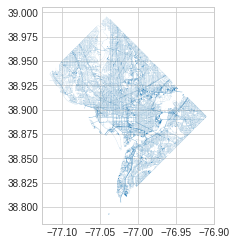

In [8]:
wash_dc.plot()

<AxesSubplot:>

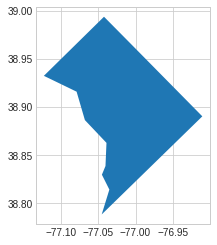

In [9]:
usa[usa.STATE_ABBR == 'DC'].plot()

In [10]:
def state_plotter(states, us_map=False):
    fig, ax = plt.subplots(figsize=(30,30))

    for n in states:
        usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor='y', linewidth=2)
    

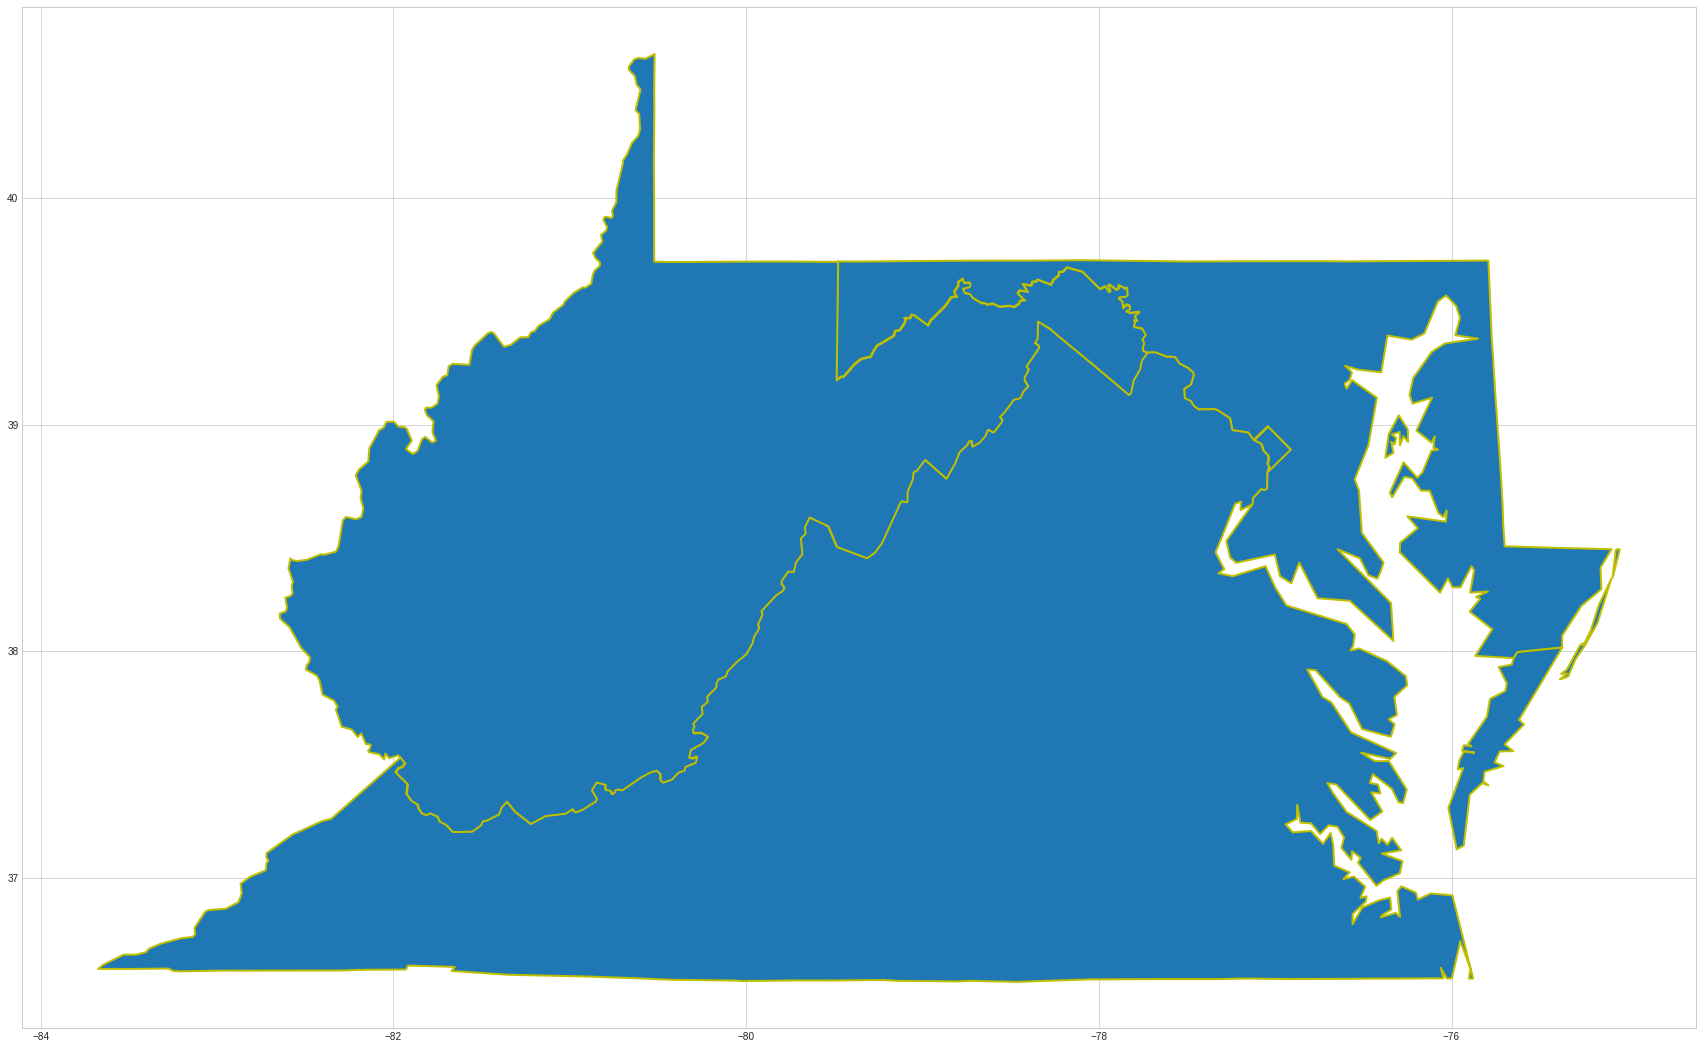

In [11]:
state_plotter(['DC','MD', 'VA', 'WV'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

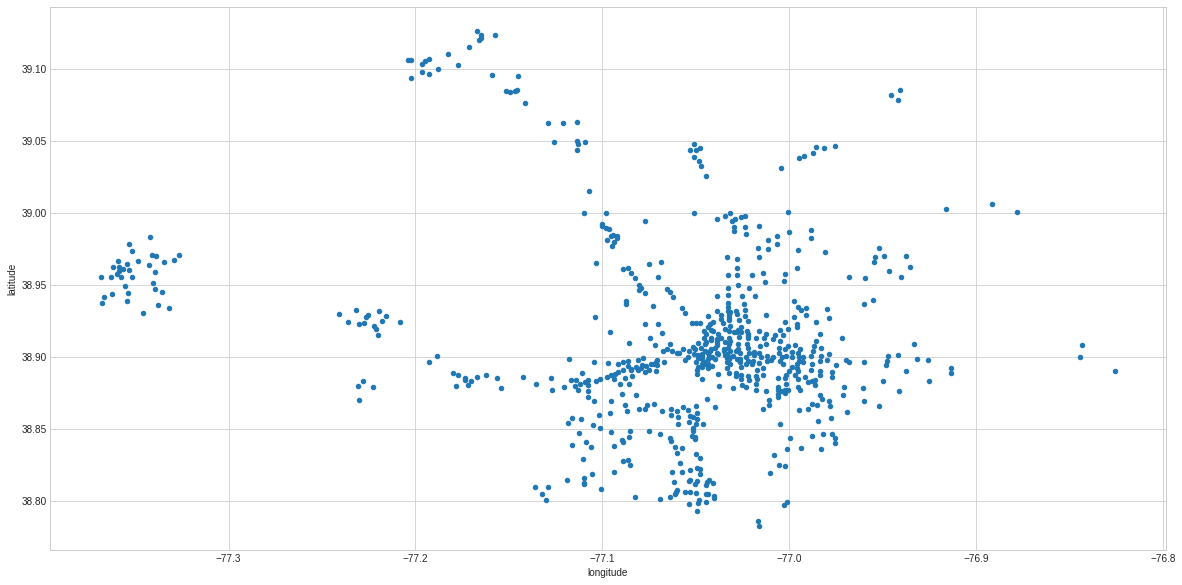

In [12]:
station_info.plot(x='longitude', y='latitude', kind='scatter', colormap='YlOrRd', figsize=(20,10))

/tmp/ipykernel_26805/814629355.py:18: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


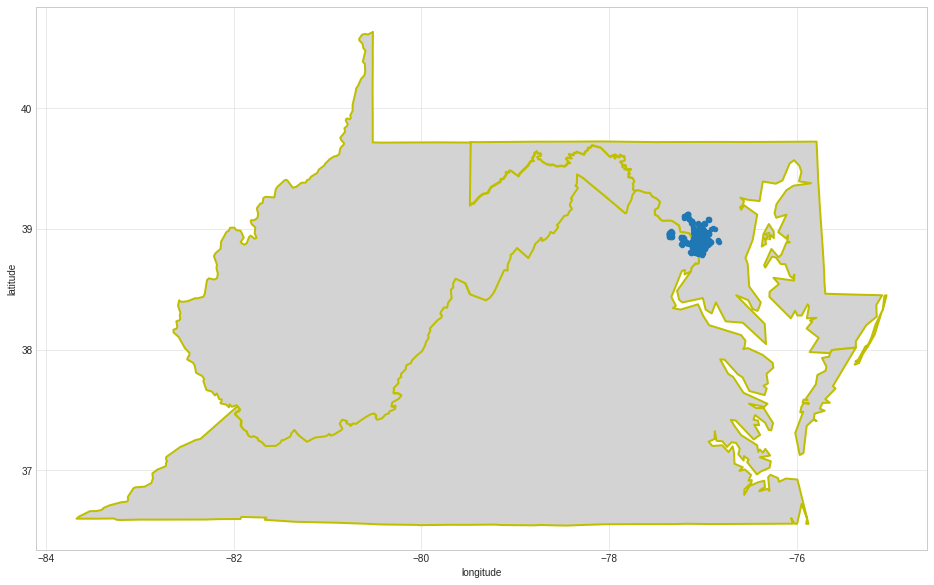

In [13]:
# initialize an axis
fig, ax = plt.subplots(figsize=(20,10))# plot map on axis
#wdc = usa[usa.STATE_ABBR == 'DC'].plot(color='lightgrey', ax=ax)
states = ['DC','MD', 'VA', 'WV']

# def state_plotter(states, us_map=False):
#     fig, ax = plt.subplots(figsize=(30,30))

for n in states:
    usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor='y', linewidth=2, color='lightgrey')
    

station_info.plot(x='longitude', y='latitude', kind='scatter', colormap='YlOrRd',ax=ax)
# df.plot(x="longitude", y="latitude", kind="scatter", 
#         c="brightness", colormap="YlOrRd", 
#         title=f"Fires in Australia {first_month} to {last_month}", 
#         ax=ax)# add grid
ax.grid(b=True, alpha=0.5)
ax.get_xlim()
ax.get_ylim()
plt.show()


/tmp/ipykernel_26805/2709287848.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


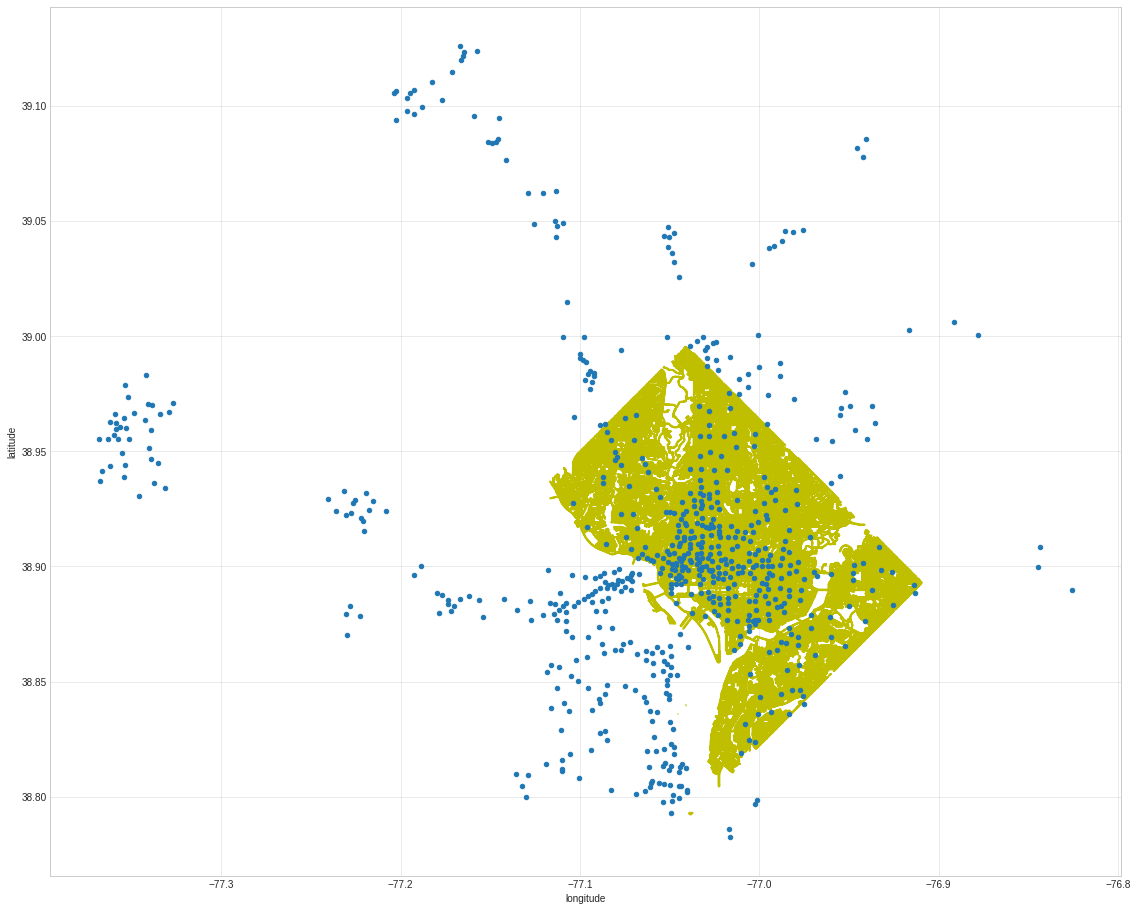

In [14]:
# initialize an axis
fig, ax = plt.subplots(figsize=(26,16))# plot map on axis
#wdc = usa[usa.STATE_ABBR == 'DC'].plot(color='lightgrey', ax=ax)
#states = ['DC','MD', 'VA', 'WV']

# def state_plotter(states, us_map=False):
#     fig, ax = plt.subplots(figsize=(30,30))

#for n in states:
#    usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor='y', linewidth=2, color='lightgrey')
    
wash_dc.plot(ax=ax, edgecolor='y', linewidth=2, color='lightgrey')

station_info.plot(x='longitude', y='latitude', kind='scatter', colormap='YlOrRd',ax=ax)
# df.plot(x="longitude", y="latitude", kind="scatter", 
#         c="brightness", colormap="YlOrRd", 
#         title=f"Fires in Australia {first_month} to {last_month}", 
#         ax=ax)# add grid
ax.grid(b=True, alpha=0.5)
ax.get_xlim()
ax.get_ylim()
plt.show()


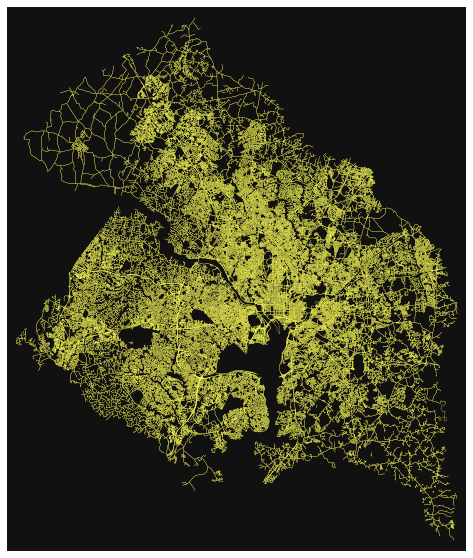

In [17]:
places = [
    {"county": "Fairfax County", "state": "Virginia"},
    {"county": "Arlington County", "state": "Virginia"},
    {"county": "Prince George's County", "state": "Maryland"},
    {"county": "Montgomery County", "state": "Maryland"},
    {"county": "Washington", "state": "District of Columbia"}
]

# use retain_all to keep all disconnected subgraphs (e.g. if your places aren't contiguous)
G = ox.graph_from_place(places, network_type="drive", retain_all=True)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="#FFFF5C", edge_linewidth=0.25, figsize=(20,10))

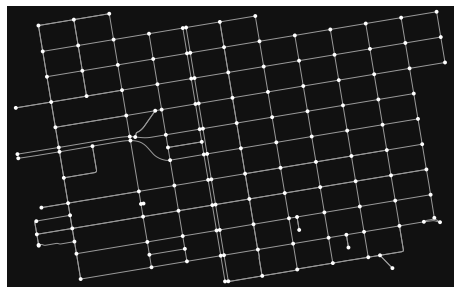

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [18]:
G = ox.graph_from_bbox(37.79, 37.78, -122.41, -122.43, network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

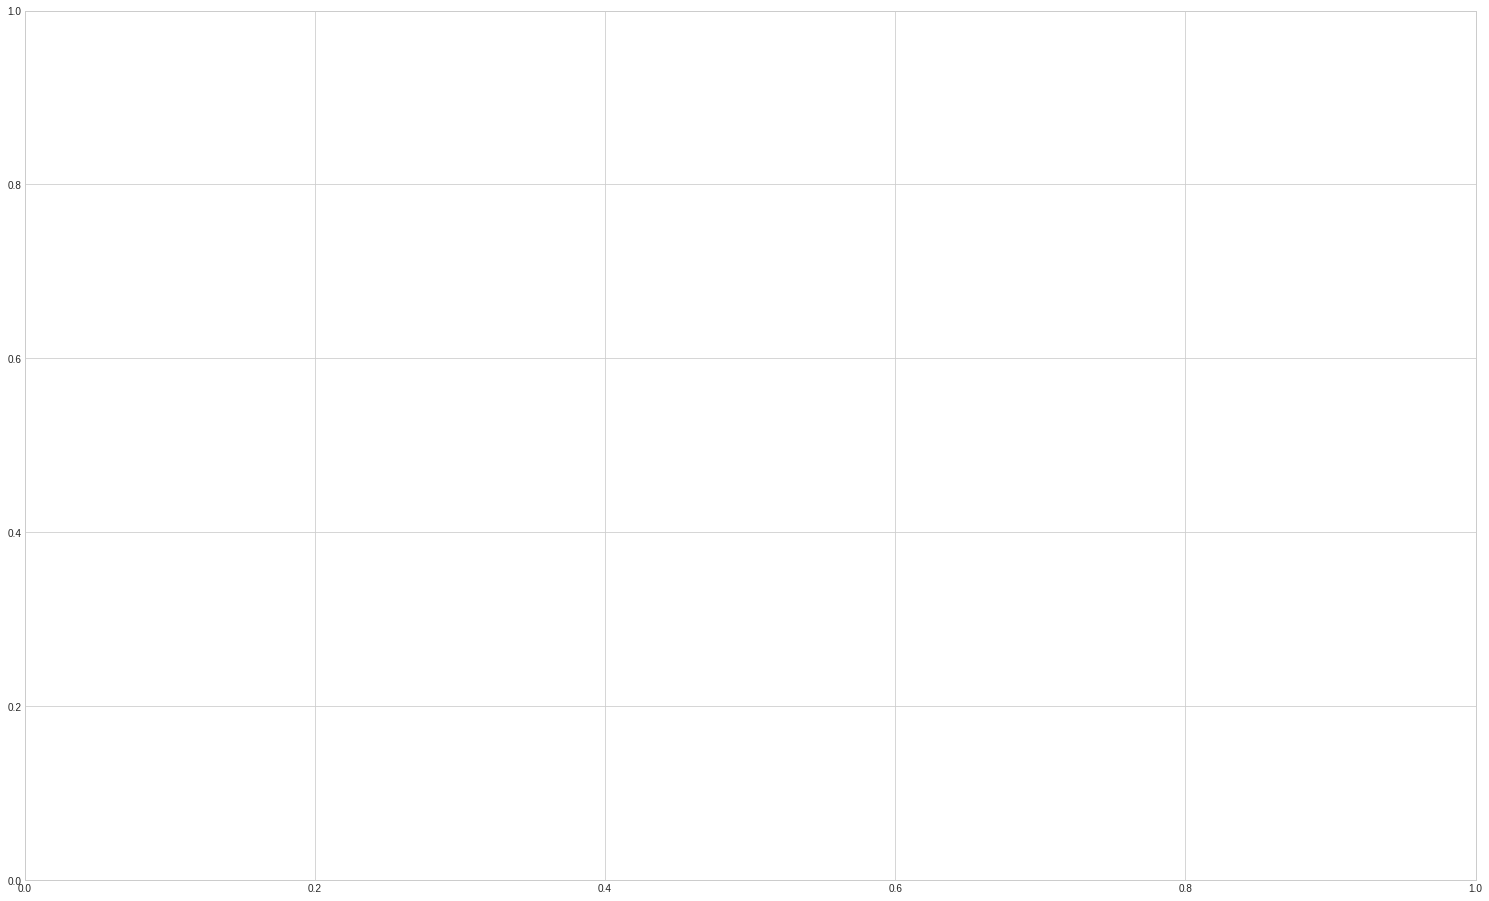

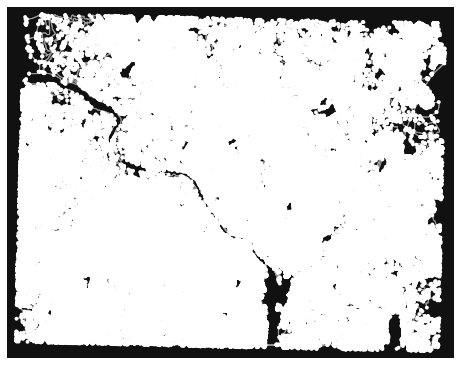

/tmp/ipykernel_26805/354197671.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, alpha=0.5)


In [19]:
# initialize an axis
fig, ax = plt.subplots(figsize=(26,16))# plot map on axis
    
#wash_dc.plot(ax=ax, edgecolor='y', linewidth=2, color='lightgrey')
G = ox.graph_from_bbox(39.13, 38.79, -76.81, -77.37, network_type='all')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

station_info.plot(x='longitude', y='latitude', kind='scatter', colormap='YlOrRd',ax=ax)

ax.grid(b=True, alpha=0.5)
ax.get_xlim()
ax.get_ylim()
plt.show()


In [ ]:
# wash_dc = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=wash_dc.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);